# SF-DAT-21 | Unit Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

In [22]:
df_raw = pd.read_csv("/Users/RyanReiger/GA_Stuff/sf-dat-21-master/unit-projects/dataset/admissions.csv")
df = df_raw.dropna()
print df.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [23]:
#quick data analysis
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [24]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  95  93  55
1         33  53  28  12


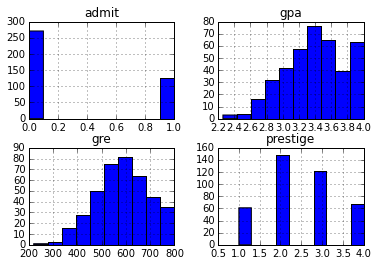

In [25]:
df.hist()
pl.show()

## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [26]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [44]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print data.head()
data['intercept'] = 1.0

   admit  gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380  3.61             0             0             1             0
1      1  660  3.67             0             0             1             0
2      1  800  4.00             1             0             0             0
3      1  640  3.19             0             0             0             1
4      0  520  2.93             0             0             0             1


#### Question 2.2. When modeling our class variables, how many do we need?

Answer: 8 (Prestiege, Admit, gpa, gre) * 2 for the dummy values

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [45]:
data.columns

Index([u'admit', u'gre', u'gpa', u'prestige_1.0', u'prestige_2.0',
       u'prestige_3.0', u'prestige_4.0', u'intercept'],
      dtype='object')

In [46]:
# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted

print pd.crosstab(data['admit'], data['prestige_1.0'], rownames=['admit'])

prestige_1.0    0   1
admit                
0             243  28
1              93  33


#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

In [53]:
df = data.rename(columns={'prestige_1.0': 'prestige_1', 'prestige_2.0': 'prestige_2', 'prestige_3.0': 'prestige_3', 'prestige_4.0': 'prestige_4'})

In [54]:
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige_1', u'prestige_2', u'prestige_3',
       u'prestige_4', u'intercept'],
      dtype='object')

In [59]:
1. * sum(df.admit == df.prestige_1) / len(df)

0.6952141057934509

In [62]:
You have a 69% change 

SyntaxError: invalid syntax (<ipython-input-62-b191923f28cc>, line 1)

In [64]:
train_cols = df.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(df['admit'], df[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [65]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Mar 2016   Pseudo R-squ.:                 0.08166
Time:                        17:02:21   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_1    -0.0609   1.01e+07  -6.04e-09      1.000     -1.98e+07  1.98e+07
prestige_2    -0.7411   1.01e+07  -7.35e-08      1.000     -1.98e+07  1.98e+07
prestige_3    -1.3996   1.01e+07  -1.39e-07      1.000     -1.98e+07  1.98e+07
prestige_4    -1.6143   1.01e+07   -1.6e-07      1.000     -1.98e+07  1.98e+07
intercept     -3.8159   1.01e+07  -3.78e-07      1.000     -1.98e+07  1.98e+07
==============================================================================
"""

#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

In [66]:
print result.conf_int()

                          0                1
gre                0.000074         0.004362
gpa                0.127619         1.431056
prestige_1 -19773157.129210  19773157.007357
prestige_2 -19773157.809346  19773156.327220
prestige_3 -19773158.467887  19773155.668680
prestige_4 -19773158.682620  19773155.453947
intercept  -19773160.884211  19773153.252356


#### Question 3.3. Calculate the odds ratio.

In [67]:
print np.exp(result.params)

gre           1.002221
gpa           2.180027
prestige_1    0.940893
prestige_2    0.476607
prestige_3    0.246695
prestige_4    0.199023
intercept     0.022017
dtype: float64


#### Question 3.4. Write this finding in a sentenance:

Answer: Corr between prestiege of undergrad and being accepted

#### Question 3.5. Print the cross tab for prestige_4.

In [61]:
## not sure how to do this one, would like to discuss during office hours

print pd.crosstab(df['admit'], df['prestige_4'], rownames=['admit'])


prestige_4    0   1
admit              
0           216  55
1           114  12


#### Question 3.6. Calculate the OR.

#### Question 3.7. Write this finding in a sentence.

Answer:

## Part 4. Analysis

In [88]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit  gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380  3.61             0             1             0
1      1  660  3.67             0             1             0
2      1  800  4.00             0             0             0
3      1  640  3.19             0             0             1
4      0  520  2.93             0             0             1


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [89]:
# manually add the intercept
data['intercept'] = 1.0

#### Question 4.1. Set the covariates to a variable called train_cols.

#### Question 4.2. Fit the model.

#### Question 4.3. Print the summary results.

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [90]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### Question 4.5. Interpret the OR of Prestige_2.

Answer:

#### Question 4.6. Interpret the OR of GPA.

Answer:

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [91]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [92]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### Question 5.1. Recreate the dummy variables.

In [ ]:
# recreate the dummy variables

# keep only what we need for making predictions


#### Question 5.2. Make predictions on the enumerated dataset.

#### Question 5.3. Interpret findings for the last 4 observations.

Answer:

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.